In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split 

In [2]:
Loan_Prediction = pd.read_csv(r"C:\Users\milind\Desktop\on drive\Class_data\ML\4. Projects\2.Project_Loan_Prediction_Class\Loan_Prediction.csv")

In [3]:
Loan_Prediction

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# check shape


In [4]:
Loan_Prediction.shape

(614, 13)

# check data frame NAN value present or not

In [5]:
Loan_Prediction.isnull().values.any()

True

# find NAN value columns in python


In [6]:
Loan_Prediction.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
Loan_Prediction[Loan_Prediction.columns[Loan_Prediction.isna().any()]]


,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,No,NaN,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0
3,Male,Yes,0,No,120.0,360.0,1.0
4,Male,No,0,No,141.0,360.0,1.0
...,...,...,...,...,...,...,...
609,Female,No,0,No,71.0,360.0,1.0
610,Male,Yes,3+,No,40.0,180.0,1.0
611,Male,Yes,1,No,253.0,360.0,1.0
612,Male,Yes,2,No,187.0,360.0,1.0


# check total number of na value in column


In [8]:

print(Loan_Prediction['Gender'].isna().sum())
print(Loan_Prediction["Married"].isna().sum())
print(Loan_Prediction['Dependents'].isna().sum())
print(Loan_Prediction["Self_Employed"].isna().sum())
print(Loan_Prediction['LoanAmount'].isna().sum())
print(Loan_Prediction["Loan_Amount_Term"].isna().sum())
print(Loan_Prediction['Credit_History'].isna().sum())



13
3
15
32
22
14
50


# check for all columns

In [9]:
Loan_Prediction["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
Loan_Prediction["Married"].value_counts()


Yes    398
No     213
Name: Married, dtype: int64

In [11]:
Loan_Prediction["Dependents"].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# important Changes 3+ to 4 in Dependents column

In [12]:
Loan_Prediction['Dependents'] = Loan_Prediction['Dependents'].replace(
                                   to_replace = '3+', value = 4)


In [13]:
Loan_Prediction["Dependents"].value_counts()


0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [14]:
Loan_Prediction["Self_Employed"].value_counts()


No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
Loan_Prediction["LoanAmount"].value_counts()


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [16]:
Loan_Prediction["Loan_Amount_Term"].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [17]:
Loan_Prediction["Credit_History"].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

# fill up NAN value by Mean

In [19]:
Loan_Prediction['Gender'] = Loan_Prediction['Gender'].fillna(
                                         Loan_Prediction['Gender'].mode()[0])
Loan_Prediction['Married'] = Loan_Prediction['Married'].fillna(
                                        Loan_Prediction['Married'].mode()[0])
Loan_Prediction['Dependents'] = Loan_Prediction['Dependents'].fillna(
                                      Loan_Prediction['Dependents'].mode()[0])
Loan_Prediction['Self_Employed'] = Loan_Prediction['Self_Employed'].fillna(
                                  Loan_Prediction['Self_Employed'].mode()[0])
Loan_Prediction['LoanAmount'] = Loan_Prediction['LoanAmount'].fillna(
                                      Loan_Prediction['LoanAmount'].mean())
Loan_Prediction['Loan_Amount_Term'] = Loan_Prediction['Loan_Amount_Term'].
                           fillna(Loan_Prediction['Loan_Amount_Term'].mean())
Loan_Prediction['Credit_History'] = Loan_Prediction['Credit_History'].
                          fillna(Loan_Prediction['Credit_History'].mode()[0])

In [20]:
Loan_Prediction

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [21]:
Loan_Prediction.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [25]:
Loan_Prediction = Loan_Prediction.drop('Loan_ID', axis=1)
Loan_Prediction

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,4,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# data set convert into Numerical Form

In [26]:
dum_LP = pd.get_dummies(Loan_Prediction, drop_first=True)


In [27]:
dum_LP

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,1,0,0,0,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,0,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,0,1,0,0,0,1,1


In [28]:

X_train = dum_LP.drop('Loan_Status_Y', axis=1)
y_train = dum_LP['Loan_Status_Y']

X_test = dum_LP.drop('Loan_Status_Y', axis=1)
y_test = dum_LP['Loan_Status_Y']


In [38]:

dtc = DecisionTreeClassifier(random_state=23,
                             max_depth=5)
dtc.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=23)

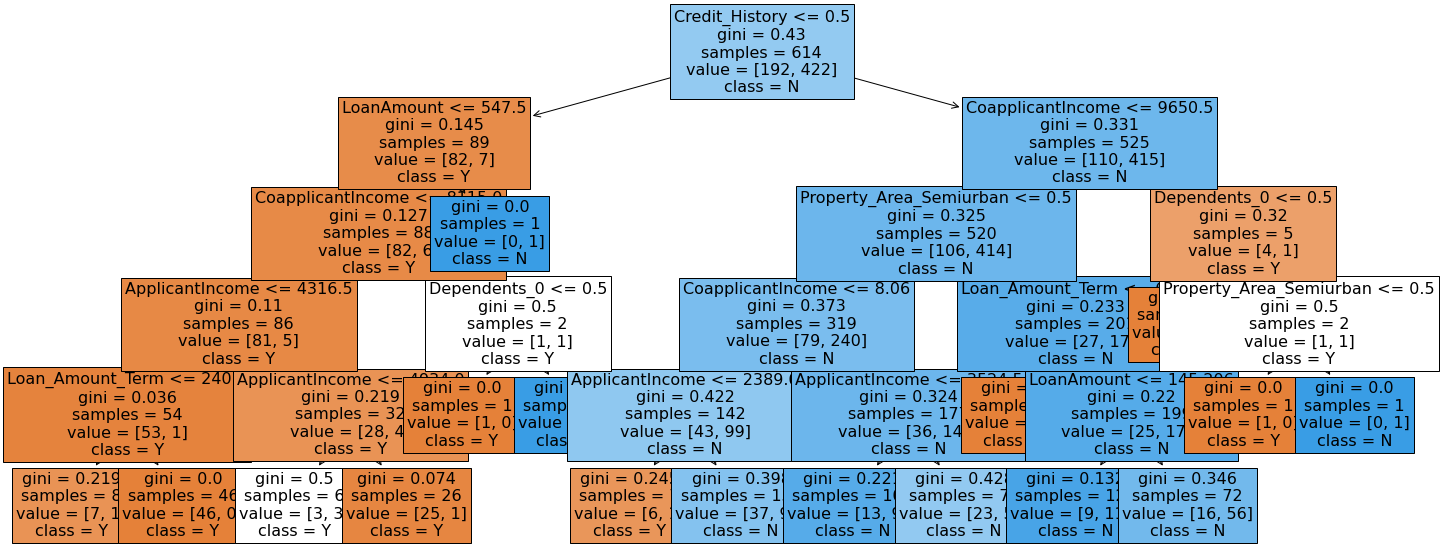

In [39]:
### Drawing a tree

plt.figure(figsize=(25,10))
tree.plot_tree(dtc,feature_names=X_train.columns,
               filled=True,fontsize=16,
               class_names=['Y', 'N']) 
plt.show()



In [40]:
#### Predicting on test data
y_pred = dtc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 94  98]
 [  6 416]]
0.8306188925081434


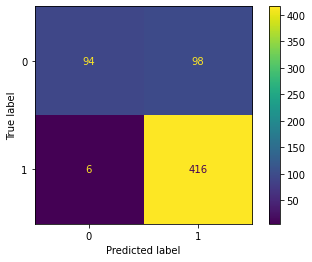

In [41]:

### Heat map of Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dtc.classes_)
disp.plot()

plt.show()